In [1]:
import os
import matplotlib.pyplot as plt
import subprocess
import sys
import numpy as np
import math
import random

In [2]:
n=1000 # no of states=1000
start=500
delta=10
theta=0.001
step = 100  
V = np.zeros(n)
V[0] = -1  #start
V[-1] = 1  #terminiation
theta = 1e-3 
delta = float('inf')

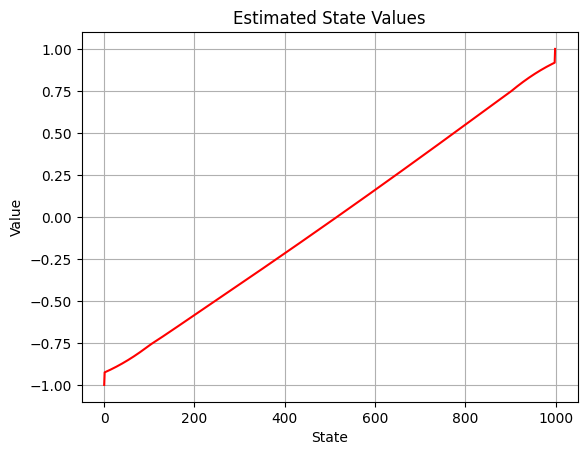

In [3]:
while delta > theta:
    delta = 0
    for state in range(1, n-1): 
        v_old = V[state]  
        summedvalued = 0
        left=0
        right=0
        for i in range(1, step+1):
            if(state-i<0):  # we should ensure we dont go beyond -1
                left= 0.5/step * V[0]
            else:
                left= 0.5/step * V[state-i]

            if(state+i>=n-1): # we should not go beyond +1
                right= 0.5/step * V[n-1]
            else:
                right= 0.5/step * V[state+i]
            
            summedvalued+=right+left
        V[state] = summedvalued
        delta = max(delta, abs(v_old - V[state]))

plt.plot(V,'-r')
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Estimated State Values')
plt.grid()

In [4]:
alpha = 2 * 10**-5
v_hat = np.zeros(10) #tengroups
episodes = 5000 
v=[0 for i in range(10)]

for i in range(episodes):
    s=[]
    s.append(start)
    while s[-1] > 1 and s[-1] < n:
        s_now = s[-1]
        if random.random() < 0.5: #toss
            nexts=s_now-random.randint(1,step)
            if(nexts<1):
                s_next=1
            else:
                s_next=nexts
        else:
            nexts=s_now+random.randint(1,step)
            if(nexts>=n):
                s_next=n
            else:
                s_next=nexts
        s.append(s_next)


    if(i%3000==0):
        print(s)
    if(s[-1]==1):
        G=[-1 for _ in range(len(s))]
    else:
        G=[1 for _ in range(len(s))]


    T = len(s)
    g=[0 for _ in range(10)]
    for t in range(T):
        s_visited = s[t]
        group = (s_visited//100) 
        for ii in range(len(g)):
            if(ii==group):
                g[ii]=1
            else:
                g[ii]=0
        for z in range(10):
            v[z]=v[z]+alpha * (G[t]- v[z]) * g[z]
            
vggregate = v

[500, 496, 441, 483, 560, 626, 600, 623, 630, 722, 677, 608, 582, 565, 498, 577, 656, 682, 587, 514, 593, 617, 684, 645, 687, 605, 674, 716, 656, 651, 617, 690, 719, 809, 813, 899, 869, 823, 859, 846, 758, 814, 861, 931, 958, 1000]
[500, 583, 660, 593, 571, 569, 498, 578, 661, 654, 705, 712, 791, 774, 845, 746, 796, 868, 876, 870, 838, 925, 932, 954, 999, 926, 870, 843, 941, 963, 868, 884, 813, 740, 658, 594, 617, 600, 525, 514, 523, 440, 365, 443, 440, 529, 597, 656, 738, 771, 853, 845, 849, 874, 807, 816, 828, 815, 851, 922, 843, 919, 874, 858, 837, 921, 988, 1000]


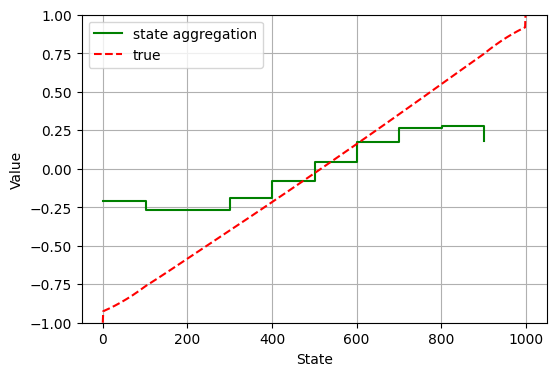

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
x_values = np.arange(1, n + 1, 100)
plt.step(x_values, vggregate, where='post', color='g',label='state aggregation')
plt.plot(V,'r--',label='true')
ax.set_xlabel('State')
ax.set_ylabel('Value')
plt.ylim(-1,1)
plt.grid()
plt.legend()

[500, 574, 509, 564, 515, 556, 457, 400, 434, 336, 298, 271, 253, 157, 200, 100, 138, 176, 156, 114, 133, 101, 123, 42, 113, 136, 86, 132, 68, 49, 134, 112, 159, 229, 244, 312, 358, 366, 317, 336, 414, 352, 447, 542, 632, 719, 620, 670, 662, 759, 772, 791, 872, 808, 785, 763, 811, 780, 853, 868, 945, 960, 865, 846, 766, 772, 808, 882, 914, 1000]
[500, 542, 482, 495, 503, 529, 602, 513, 576, 553, 561, 490, 567, 605, 600, 626, 565, 513, 445, 479, 483, 544, 515, 606, 646, 682, 589, 663, 568, 532, 445, 507, 607, 579, 670, 701, 663, 667, 592, 508, 565, 560, 569, 553, 507, 491, 474, 426, 342, 245, 236, 336, 253, 233, 296, 259, 176, 239, 285, 191, 230, 184, 150, 107, 191, 277, 370, 314, 397, 437, 405, 348, 438, 496, 491, 516, 450, 433, 522, 607, 601, 590, 510, 488, 537, 525, 575, 549, 619, 551, 589, 626, 673, 595, 560, 629, 621, 606, 589, 581, 674, 577, 573, 572, 593, 582, 610, 625, 652, 642, 609, 571, 544, 558, 458, 449, 349, 258, 309, 355, 272, 285, 377, 461, 416, 334, 369, 410, 455, 471, 5

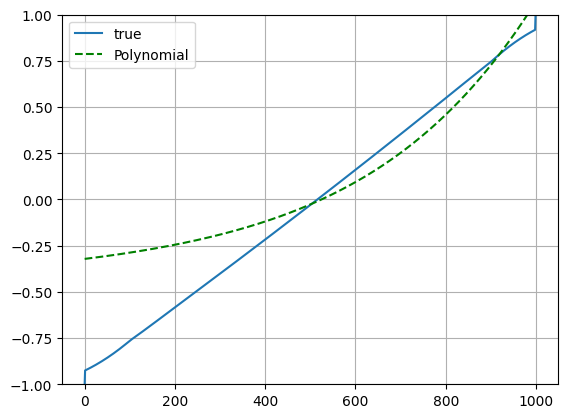

In [6]:
order = 5
num_feat = order + 1
w=[0 for i in range(num_feat)]

episodes = 5000
counter = 0
S = 1000  

def features(s_visited):
    return np.array([s_visited ** j for j in range(num_feat)])

for i in range(episodes):
    s=[]
    s.append(start)
    while s[-1] > 1 and s[-1] < n:
        s_now = s[-1]
        if random.random() < 0.5: #toss
            nexts=s_now-random.randint(1,step)
            if(nexts<1):
                s_next=1
            else:
                s_next=nexts
        else:
            nexts=s_now+random.randint(1,step)
            if(nexts>=n):
                s_next=n
            else:
                s_next=nexts
        s.append(s_next)


    if(i%3000==0):
        print(s)
    if(s[-1]==1):
        G=[-1 for _ in range(len(s))]
    else:
        G=[1 for _ in range(len(s))]
        
    T = len(s)
    for t in range(T):
        s_visited = s[t] / S
        features_s= [s_visited ** j for j in range(num_feat)]
        dot_product_result = 0
        for i in range(len(features_s)):
            dot_product_result += features_s[i] * w[i]
        for k in range(num_feat):
            w[k] += alpha * (G[t] - dot_product_result) * features_s[k]
            
            
s_all = np.arange(1, S + 1) / S
features_all = [features(s_visited) for s_visited in s_all]  
v_hat_poly = [sum(feat * weight for feat, weight in zip(features_all[i], w)) for i in range(len(features_all))]  

print(len(features_all))
print(len(s_all))
print(len(w))

plt.plot(V,label='true')
plt.plot(v_hat_poly,'g--',label='Polynomial')
ax.set_xlabel('State')
ax.set_ylabel('Value')
plt.ylim(-1,1)
plt.grid()
plt.legend()

[500, 550, 504, 496, 590, 554, 611, 551, 591, 674, 691, 680, 756, 738, 837, 910, 876, 836, 871, 813, 777, 770, 785, 712, 770, 728, 775, 773, 851, 895, 946, 959, 970, 972, 952, 930, 1000]
[500, 499, 593, 553, 535, 442, 397, 406, 314, 294, 235, 159, 229, 214, 152, 215, 126, 174, 257, 244, 317, 254, 246, 222, 192, 218, 300, 395, 360, 450, 414, 359, 297, 207, 148, 96, 139, 77, 110, 125, 153, 229, 306, 258, 260, 358, 411, 478, 403, 408, 369, 414, 498, 546, 525, 572, 596, 504, 554, 527, 580, 629, 584, 562, 543, 474, 375, 383, 295, 249, 267, 227, 260, 359, 420, 520, 466, 379, 467, 463, 472, 461, 381, 366, 462, 440, 438, 488, 575, 615, 542, 492, 424, 395, 482, 481, 560, 503, 533, 569, 568, 645, 707, 608, 598, 547, 607, 573, 563, 602, 507, 486, 575, 529, 431, 379, 374, 369, 456, 523, 468, 513, 533, 535, 473, 526, 608, 529, 608, 669, 619, 666, 734, 751, 833, 924, 915, 858, 915, 981, 930, 1000]


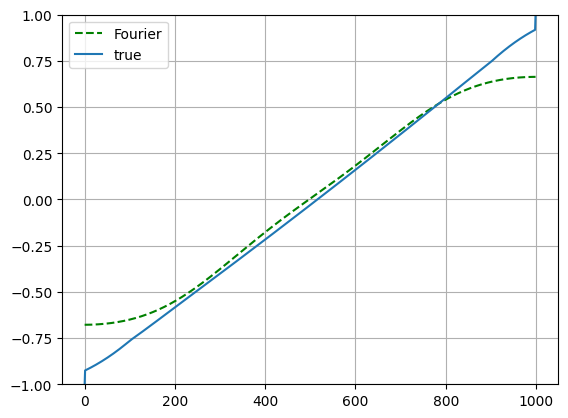

In [7]:

order = 5
num_feat = order + 1
w=[0 for i in range(num_feat)]

episodes = 5000
counter = 0
S = 1000  

def features(s_visited):
    return np.array([s_visited ** j for j in range(num_feat)])

for i in range(episodes):
    s=[]
    s.append(start)
    while s[-1] > 1 and s[-1] < n:
        s_now = s[-1]
        if random.random() < 0.5: #toss
            nexts=s_now-random.randint(1,step)
            if(nexts<1):
                s_next=1
            else:
                s_next=nexts
        else:
            nexts=s_now+random.randint(1,step)
            if(nexts>=n):
                s_next=n
            else:
                s_next=nexts
        s.append(s_next)


    if(i%3000==0):
        print(s)
    if(s[-1]==1):
        G=[-1 for _ in range(len(s))]
    else:
        G=[1 for _ in range(len(s))]
        
    T = len(s)
    for t in range(T):
        s_visited = s[t] / S
        features_s = [0 for _ in range(num_feat)]
        for j in range(order + 1):
            features_s[j] = np.cos(np.pi * s_visited * j)

        dot_product_result = 0  # Initialize the dot product result
        for ii in range(len(features_s)):
            dot_product_result += features_s[ii] * w[ii]

        for k in range(num_feat):
            w[k] += alpha * (G[t] - dot_product_result) * features_s[k]


    

s_all = [(i + 1) / S for i in range(S)]
features_all = [[0] * (order + 1) for _ in range(S)]  

for j in range(order + 1):
    for i in range(S):
        features_all[i][j] = math.cos(math.pi * s_all[i] * j)

v_hat_fourier = [0] * S
for i in range(S):
    for j in range(order + 1): 
        v_hat_fourier[i] += features_all[i][j] * w[j] 

plt.plot(v_hat_fourier,'g--',label='Fourier')
plt.plot(V,label='true')
ax.set_xlabel('State')
ax.set_ylabel('Value')
plt.ylim(-1,1)
plt.grid()
plt.legend()

1000
1000
6


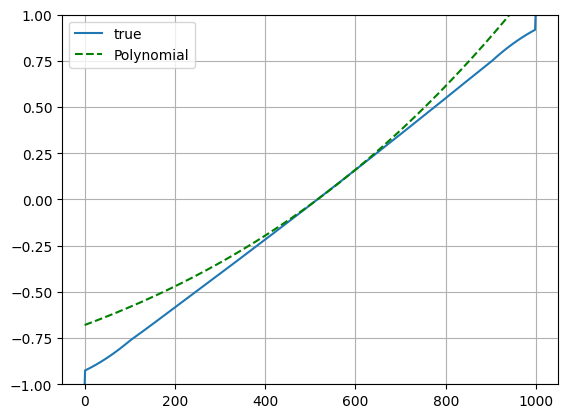

In [9]:
order = 5
num_feat = order + 1
w=[0 for i in range(num_feat)]

episodes = 50000
counter = 0
S = 1000  

def features(s_visited):
    return np.array([s_visited ** j for j in range(num_feat)])

for i in range(episodes):
    s=[]
    s.append(start)
    while s[-1] > 1 and s[-1] < n:
        s_now = s[-1]
        if random.random() < 0.5: #toss
            nexts=s_now-random.randint(1,step)
            if(nexts<1):
                s_next=1
            else:
                s_next=nexts
        else:
            nexts=s_now+random.randint(1,step)
            if(nexts>=n):
                s_next=n
            else:
                s_next=nexts
        s.append(s_next)



    if(s[-1]==1):
        G=[-1 for _ in range(len(s))]
    else:
        G=[1 for _ in range(len(s))]
        
    T = len(s)
    for t in range(T):
        s_visited = s[t] / S
        features_s= [s_visited ** j for j in range(num_feat)]
        dot_product_result = 0
        for i in range(len(features_s)):
            dot_product_result += features_s[i] * w[i]
        for k in range(num_feat):
            w[k] += alpha * (G[t] - dot_product_result) * features_s[k]
            
            
s_all = np.arange(1, S + 1) / S
features_all = [features(s_visited) for s_visited in s_all]  
v_hat_poly = [sum(feat * weight for feat, weight in zip(features_all[i], w)) for i in range(len(features_all))]  

print(len(features_all))
print(len(s_all))
print(len(w))

plt.plot(V,label='true')
plt.plot(v_hat_poly,'g--',label='Polynomial')
ax.set_xlabel('State')
ax.set_ylabel('Value')
plt.ylim(-1,1)
plt.grid()
plt.legend()